# **Reading and Extraction DICOM Files (Both Images and Patient's Data)**


File 1/7: IS20250218_193621_8940_10081171.dcm


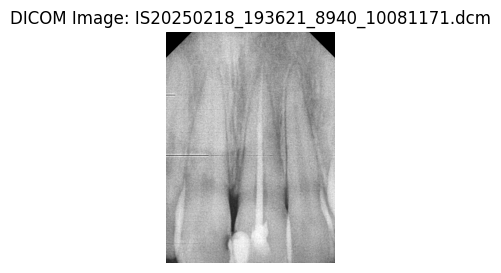

Patient's Data:
PatientName:  naglaxmi
PatientID: 20250209_111652
Modality: IO
StudyDate: 20250218
Rows: 1095
Columns: 800

File 2/7: IS20250116_180218_7445_56958340.dcm


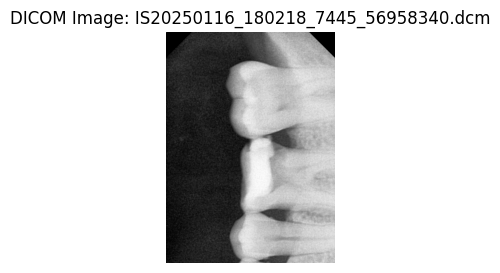

Patient's Data:
PatientName:  suman
PatientID: 20250113_174950
Modality: IO
StudyDate: 20250116
Rows: 1095
Columns: 800

File 3/7: IS20250115_190348_9148_86297118.dcm


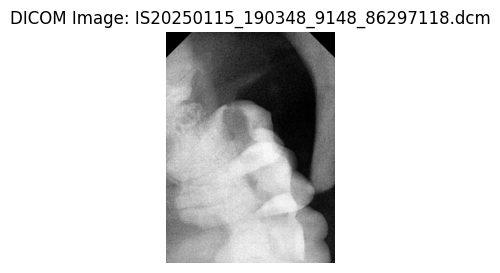

Patient's Data:
PatientName:  kaushalya
PatientID: 20241118_173348
Modality: IO
StudyDate: 20250115
Rows: 1095
Columns: 800

File 4/7: IS20250115_171841_9465_61003253.dcm


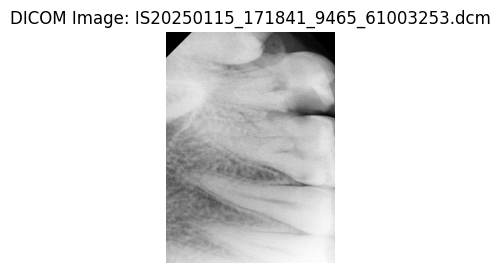

Patient's Data:
PatientName:  abhishek singh
PatientID: 20250115_171637
Modality: IO
StudyDate: 20250115
Rows: 1095
Columns: 800

File 5/7: IS20250218_193552_3393_78829426.dcm


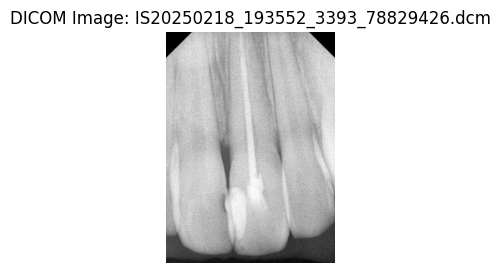

Patient's Data:
PatientName:  naglaxmi
PatientID: 20250209_111652
Modality: IO
StudyDate: 20250218
Rows: 1095
Columns: 800

File 6/7: IS20250115_191316_7227_10120577.dcm


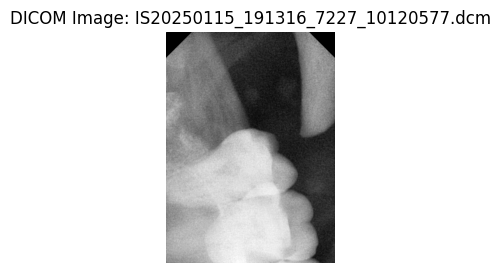

Patient's Data:
PatientName:  kaushalya
PatientID: 20241118_173348
Modality: IO
StudyDate: 20250115
Rows: 1095
Columns: 800

File 7/7: IS20250221_192657_5718_56712676.dcm


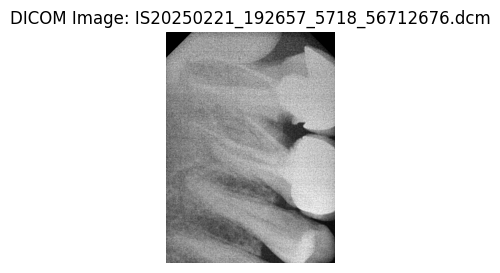

Patient's Data:
PatientName:  bhamini modi
PatientID: 20250221_192601
Modality: IO
StudyDate: 20250221
Rows: 1095
Columns: 800


In [57]:
import os
import pydicom
import matplotlib.pyplot as plt

# Path to given DICOM Dataset
project_folder = "/content/drive/MyDrive/Images_Data_science_intern"

# Here we access all DICOM files
project_files = ([f for f in os.listdir(project_folder) if f.endswith(".dcm")])

# Creation of arrray in which we store our original dicom images after extraction
original_images = []

#Accessing all the images and patient data in those DICOM files
def display(project_folder):
    ds = pydicom.dcmread(project_folder)
    pixel_array = ds.pixel_array
    original_images.append(pixel_array)

    # Displaying images
    plt.figure(figsize=(3, 3))
    plt.imshow(pixel_array, cmap='gray')
    plt.title(f"DICOM Image: {os.path.basename(project_folder)}")
    plt.axis('off')
    plt.show()

    # Printing Patient data in files
    print("Patient's Data:")
    for key in ["PatientName", "PatientID", "Modality", "StudyDate", "Rows", "Columns"]:
        if key in ds:
            print(f"{key}: {ds.data_element(key).value}")

# Running a loop to display the data one-by-one
for i, project_file in enumerate(project_files):
    full_path = os.path.join(project_folder, project_file)
    print(f"\nFile {i+1}/{len(project_files)}: {project_file}")
    display(full_path)


# **Computing image's quality matrice's {Brightness, Contrast, Sharpness, Noise}**

In [31]:
import numpy as np
import cv2
from skimage.util import view_as_windows
import pandas as pd

def calculating_brightness(img):
    return np.mean(img)

def calculating_contrast(img):
    return np.std(img)

def calculating_sharpness(img):
    laplacian = cv2.Laplacian(img, cv2.CV_F)
    return laplacian.var()

def estimate_noise(img):
    h, w = img.shape
    crop = img[h//4:h//4*3, w//4:w//4*3]
    return np.std(crop)


In [32]:
# Path to given DICOM Dataset
project_folder = "/content/drive/MyDrive/Images_Data_science_intern"
project_files = [f for f in os.listdir(project_folder) if f.endswith(".dcm")]

# Here we have created a list to display the result we will be getting of image qulaity
results = []

for file in project_files:
    path = os.path.join(project_folder, file)
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)

    brightness = calculating_brightness(img)
    contrast = calculating_contrast(img)
    sharpness = calculating_sharpness(img)
    noise = estimate_noise(img)

    results.append({
        "filename": file,
        "brightness": brightness,
        "contrast": contrast,
        "sharpness": sharpness,
        "noise": noise
    })

# Converting Data into DataFrame
df_metrics = pd.DataFrame(results)
df_metrics.head()


filename  brightness   contrast   sharpness  \
0  IS20250218_193621_8940_10081171.dcm  166.896805  34.428059  236.923126   
1  IS20250116_180218_7445_56958340.dcm  116.353638  83.571518   89.436760   
2  IS20250115_190348_9148_86297118.dcm  130.841949  76.732536  116.697861   
3  IS20250115_171841_9465_61003253.dcm  174.680298  49.159847   82.741928   
4  IS20250218_193552_3393_78829426.dcm  175.434189  50.173656  175.698090   

       noise  
0  28.799599  
1  85.343842  
2  76.989708  
3  25.649694  
4  29.262556

Visualization of Image's quality matrice with frequency

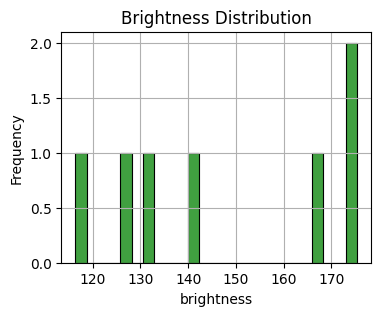

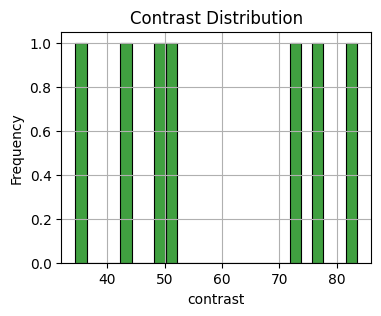

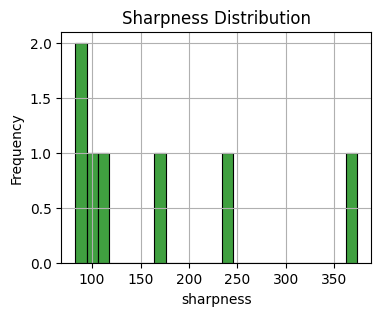

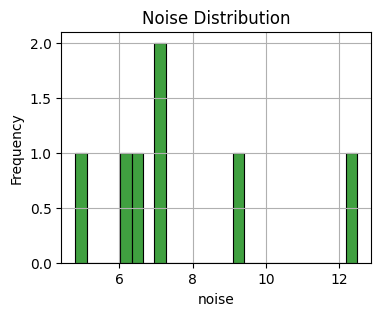

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of following Features of image with Frequency of image
metrics = ["brightness", "contrast", "sharpness", "noise"]
for metric in metrics:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_metrics[metric], kde=False, bins=25, color='green')
    plt.title(f"{metric.capitalize()} Distribution")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# **Processing Files using Static Method ( Static Preprocessing Pipeline )**


Displaying comparison for image 1: IS20250218_193621_8940_10081171.dcm


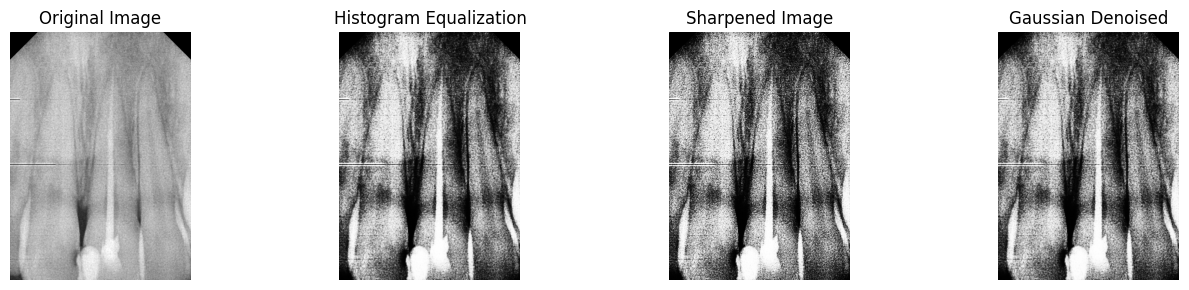


Displaying comparison for image 2: IS20250116_180218_7445_56958340.dcm


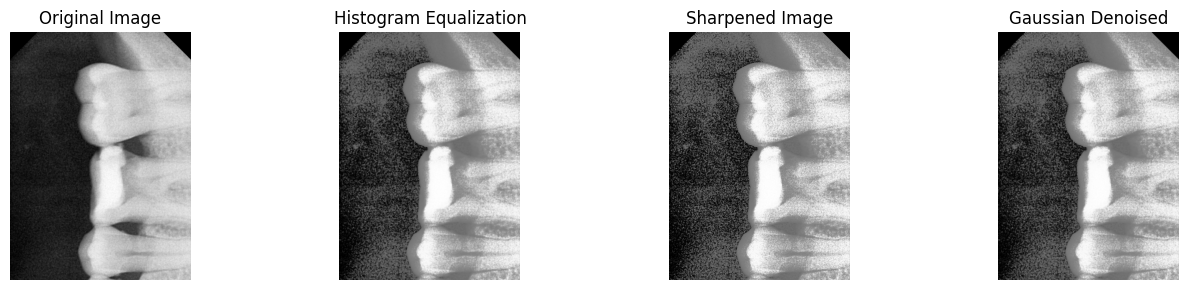


Displaying comparison for image 3: IS20250115_190348_9148_86297118.dcm


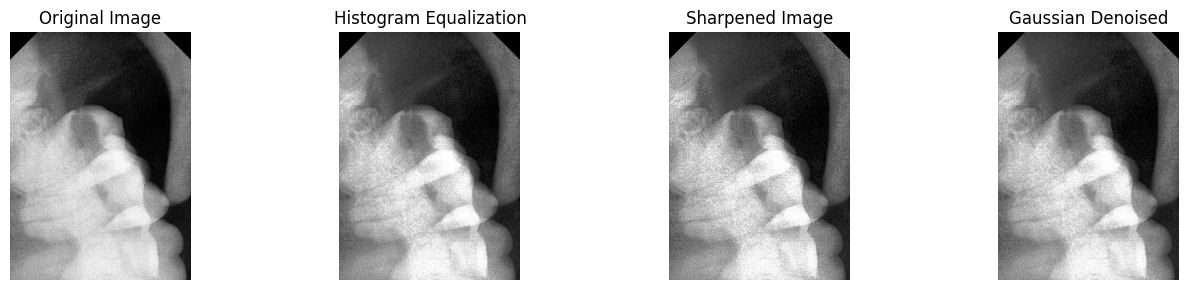


Displaying comparison for image 4: IS20250115_171841_9465_61003253.dcm


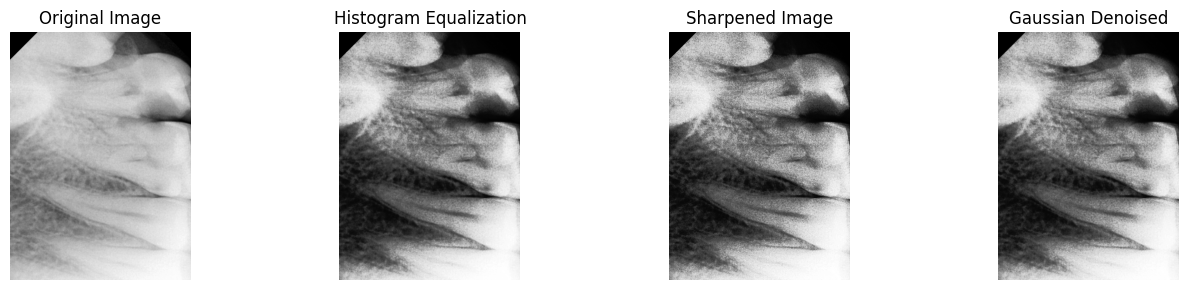


Displaying comparison for image 5: IS20250218_193552_3393_78829426.dcm


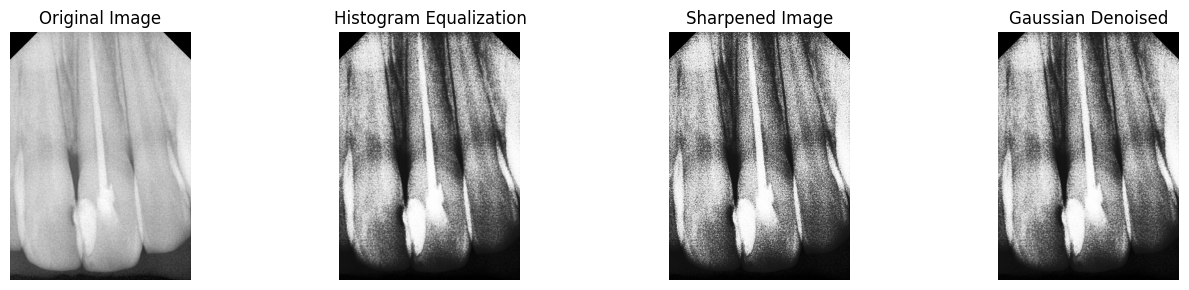


Displaying comparison for image 6: IS20250115_191316_7227_10120577.dcm


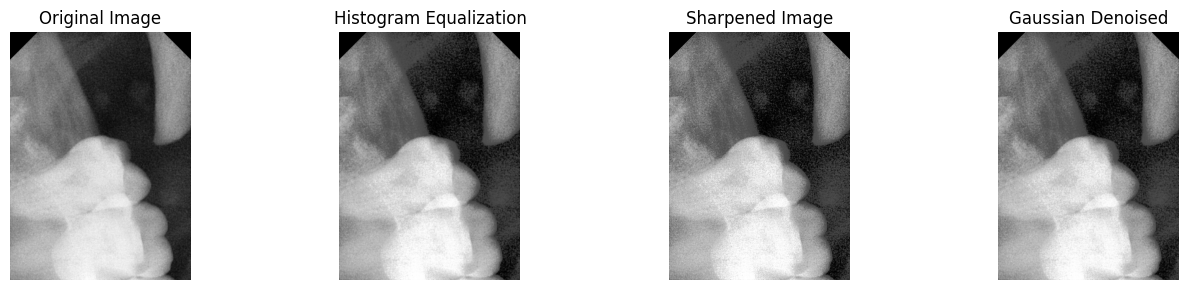


Displaying comparison for image 7: IS20250221_192657_5718_56712676.dcm


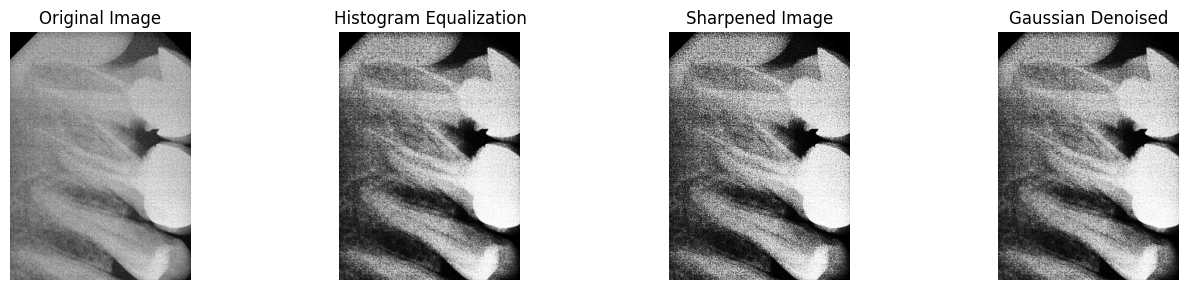

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import pydicom

def histogram_equalization(img):
    img_eq = cv2.equalizeHist(img.astype(np.uint8))
    return img_eq

def apply_sharpening(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

def apply_gaussian_denoising(img):
    return cv2.GaussianBlur(img, (5, 5), 0)


# Comparison of Before and After the Preprocessing of image
def task(files):
    ds = pydicom.dcmread(files)
    original_img = ds.pixel_array.astype(np.uint8)

    # Apply static preprocessing
    hist_eq_img = histogram_equalization(original_img)
    sharpened_img = apply_sharpening(hist_eq_img)
    denoised_img = apply_gaussian_denoising(sharpened_img)

    # Image Visulaization of preprocessing
    fig, axs = plt.subplots(1, 4, figsize=(14, 3))
    axs[0].imshow(original_img, cmap='gray')
    axs[0].set_title("Original Image")

    axs[1].imshow(hist_eq_img, cmap='gray')
    axs[1].set_title("Histogram Equalization")

    axs[2].imshow(sharpened_img, cmap='gray')
    axs[2].set_title("Sharpened Image")

    axs[3].imshow(denoised_img, cmap='gray')
    axs[3].set_title("Gaussian Denoised")

    for ax in axs:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

    return original_img, denoised_img

project_folder = "/content/drive/MyDrive/Images_Data_science_intern"
project_files = [f for f in os.listdir(project_folder) if f.endswith(".dcm")]

# List to store the denoised final images
static_denoised_images_array = []

# Loop through each file and compare it with Histogram, Sharpened and Gaussian image's result
for i, filename in enumerate(project_files):
    print(f"\nDisplaying comparison for image {i+1}: {filename}")
    files = os.path.join(project_folder, filename)
    original_img, denoised = task(files)
    static_denoised_images_array.append(denoised)


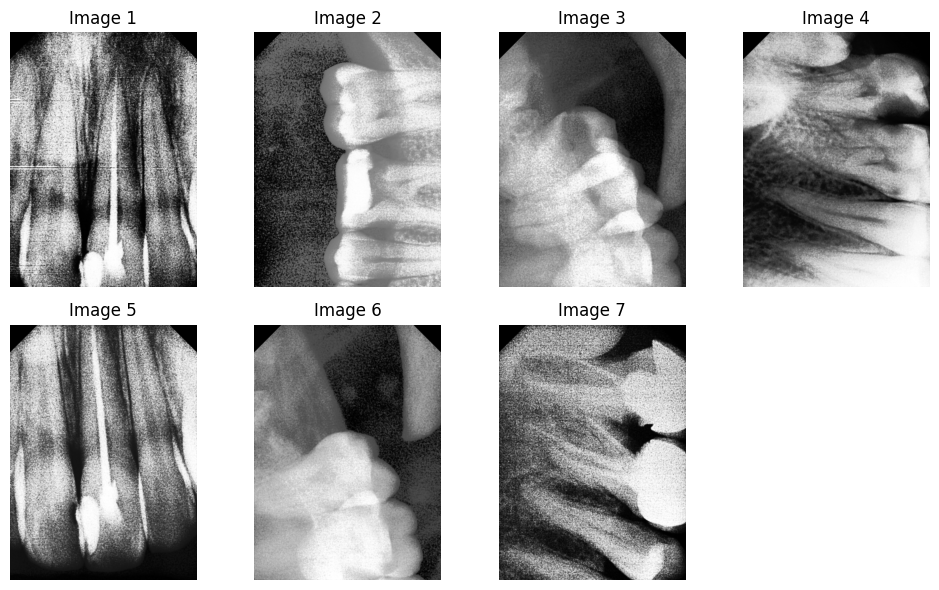

In [15]:
import math

n = len(static_denoised_images_array)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(10, 3* rows))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(static_denoised_images_array[i], cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Processing Files using Adaptive Method ( Adaptive Preprocessing Pipeline )**


 Processing IS20250218_193621_8940_10081171.dcm
Low contrast detected
CLAHE clipLimit set to: 2.56
High noise detected: 28.80
Using NLM Denoising with h=15


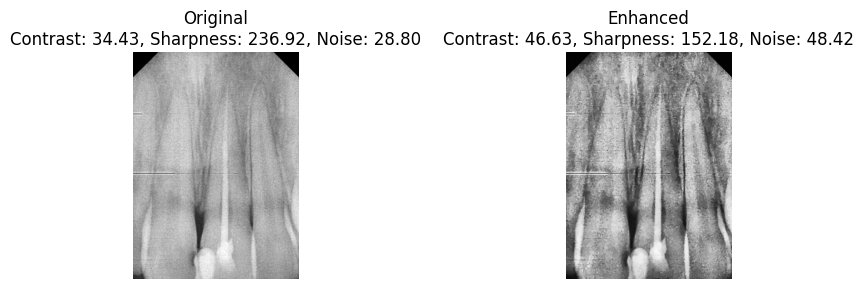


 Processing IS20250116_180218_7445_56958340.dcm
High noise detected: 85.34
Using Bilateral Filter for strong noise


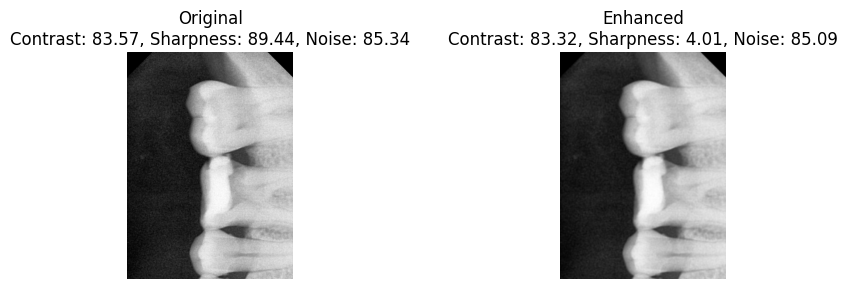


 Processing IS20250115_190348_9148_86297118.dcm
High noise detected: 76.99
Using Bilateral Filter for strong noise


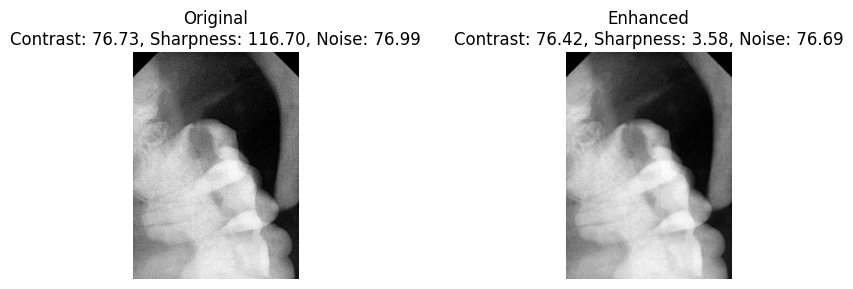


 Processing IS20250115_171841_9465_61003253.dcm
High noise detected: 25.65
Using NLM Denoising with h=15


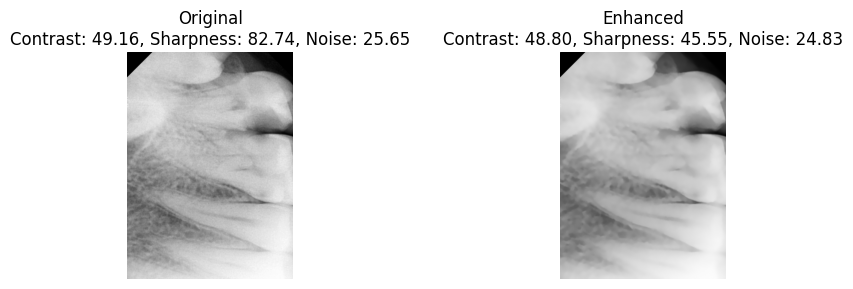


 Processing IS20250218_193552_3393_78829426.dcm
High noise detected: 29.26
Using NLM Denoising with h=15


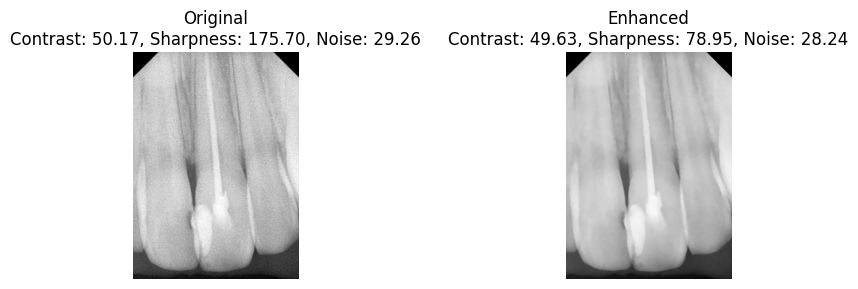


 Processing IS20250115_191316_7227_10120577.dcm
High noise detected: 77.35
Using Bilateral Filter for strong noise


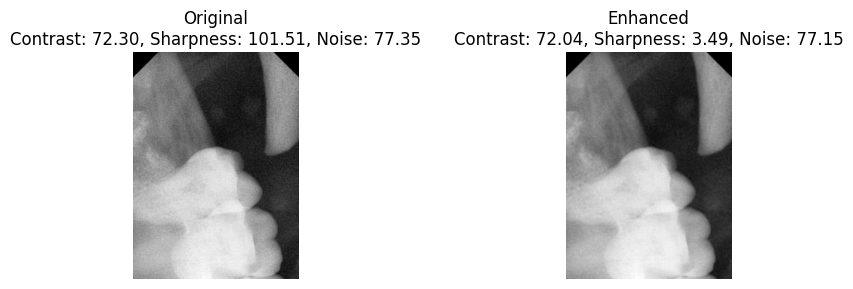


 Processing IS20250221_192657_5718_56712676.dcm
High noise detected: 32.45
Using Bilateral Filter for strong noise


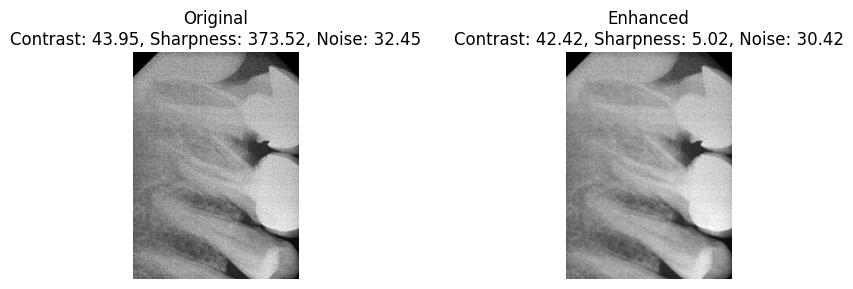

Adaptive preprocessing complete.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install pydicom
import pydicom
import os

adaptive_enhanced_images_array = []

# Quality Matric of given files also calculated above and created table from it
def calculate_contrast(img):
    return np.std(img)

def calculate_sharpness(img):
    return cv2.Laplacian(img, cv2.CV_32F).var()

def estimate_noise(img):
    h, w = img.shape
    crop = img[h//4:h//4*3, w//4:w//4*3]
    return np.std(crop)

# Adaptive preprocessing functions required to process the images

def apply_clahe_adaptive(img, contrast):
    # We will be increasing cliplimit if contrast is very low, otherwise we will keep it moderate
    clip_limit = max(2.0, 6.0 - contrast / 10)
    # CLiplimit here is from 2.0 to 6.0
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8,8))
    print(f"CLAHE clipLimit set to: {clip_limit:.2f}")
    return clahe.apply(img)

def unsharp_mask_adaptive(img, sharpness):
    # We will be increasing the sharpness if it is too low
    weight = min(2.5, 1.5 + (SHARPNESS_THRESHOLD - sharpness) / 30)
    weight = max(1.0, weight)
    gaussian = cv2.GaussianBlur(img, (9, 9), 10.0)
    print(f"Unsharp mask weight set to: {weight:.2f}")
    return cv2.addWeighted(img, weight, gaussian, 1 - weight, 0)

def adaptive_denoise(img, noise_level):
    if noise_level > 30:
        print("Using Bilateral Filter for strong noise")
        return cv2.bilateralFilter(img, 9, 150, 150)
    elif noise_level > NOISE_THRESHOLD:
        h = min(15, max(7, noise_level))
        # h parameter is for denoising noise based on NLM denoising
        print(f"Using NLM Denoising with h={h}")
        return cv2.fastNlMeansDenoising(img, None, h, 7, 21)
    else:
        print("Noise level low, no denoising applied")
        return img

# Threshold limit to apply adaptive preprocessing
CONTRAST_THRESHOLD = 40.0
SHARPNESS_THRESHOLD = 50.0
NOISE_THRESHOLD = 10.0

def adaptive_preprocessing(img, contrast, sharpness, noise):
    processed = img.copy()
    if contrast < CONTRAST_THRESHOLD:
        print("Low contrast detected")
        processed = apply_clahe_adaptive(processed, contrast)
    if sharpness < SHARPNESS_THRESHOLD:
        print("Low sharpness detected")
        processed = unsharp_mask_adaptive(processed, sharpness)
    if noise > NOISE_THRESHOLD:
        print(f"High noise detected: {noise:.2f}")
        processed = adaptive_denoise(processed, noise)
    return processed

# Visualization of result of images before and after preprocessing
def visualize_adaptive(original_img, enhanced_img, original_metrics, enhanced_metrics, title="Adaptive Preprocessing"):
    fig, axs = plt.subplots(1, 2, figsize=(11, 3))
    axs[0].imshow(original_img, cmap='gray')
    axs[0].set_title(f"Original\nContrast: {original_metrics[0]:.2f}, Sharpness: {original_metrics[1]:.2f}, Noise: {original_metrics[2]:.2f}")
    axs[1].imshow(enhanced_img, cmap='gray')
    axs[1].set_title(f"Enhanced\nContrast: {enhanced_metrics[0]:.2f}, Sharpness: {enhanced_metrics[1]:.2f}, Noise: {enhanced_metrics[2]:.2f}")
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

project_folder = "/content/drive/MyDrive/Images_Data_science_intern/"
output_folder = os.path.join(project_folder, "processed")
os.makedirs(output_folder, exist_ok=True)

dcm_files = [f for f in os.listdir(project_folder) if f.endswith(".dcm")]

# We are including the image qualities of before and after of preprocessing in an image
for file in dcm_files:
    filepath = os.path.join(project_folder, file)
    ds = pydicom.dcmread(filepath)
    original_img = ds.pixel_array.astype(np.uint8)

    contrast = calculate_contrast(original_img)
    sharpness = calculate_sharpness(original_img)
    noise = estimate_noise(original_img)

    print(f"\n Processing {file}")

    enhanced_img = adaptive_preprocessing(original_img, contrast, sharpness, noise)
    adaptive_enhanced_images_array.append(enhanced_img)

    contrast_enh = calculate_contrast(enhanced_img)
    sharpness_enh = calculate_sharpness(enhanced_img)
    noise_enh = estimate_noise(enhanced_img)

    visualize_adaptive(
        original_img,
        enhanced_img,
        (contrast, sharpness, noise),
        (contrast_enh, sharpness_enh, noise_enh),
        title=f"Processed: {file}"
    )

    # Saving our processed images in a output_path folder
    output_path = os.path.join(output_folder, file.replace(".dcm", "_processed.png"))
    cv2.imwrite(output_path, enhanced_img)

print("Adaptive preprocessing complete.")


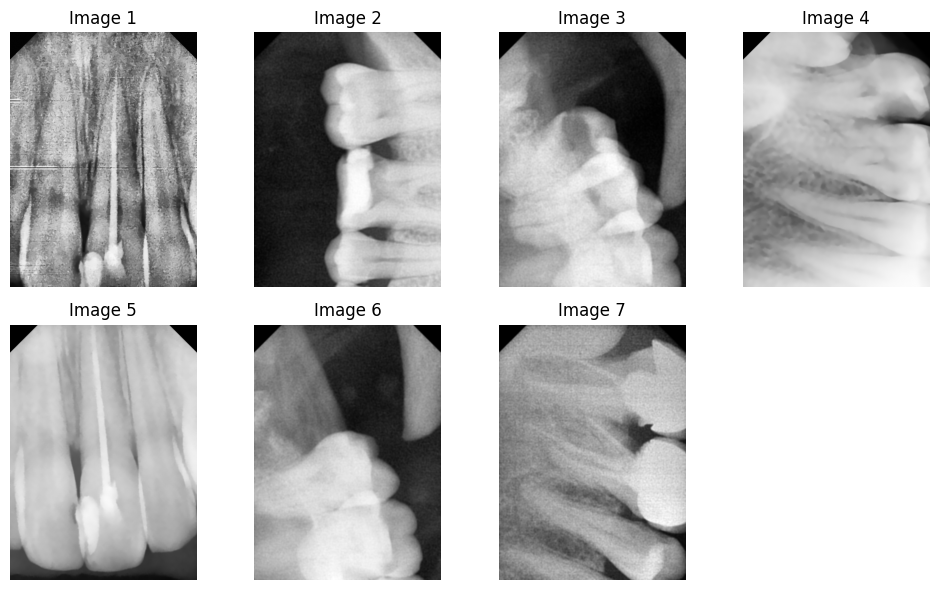

In [13]:
import math

n = len(adaptive_enhanced_images_array)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(10, 3* rows))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(adaptive_enhanced_images_array[i], cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Comparison of Original, Static and Adaptive pipeline processed images**

In [44]:
# Objective Matrice which can tell us which method is better for processing image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Define metric containers to store the data
psnr_original, psnr_static, psnr_adaptive = [], [], []
ssim_original, ssim_static, ssim_adaptive = [], [], []
sharpness_original, sharpness_static, sharpness_adaptive = [], [], []
edges_original, edges_static, edges_adaptive = [], [], []

# Edge clarity metric using Canny-Edge detector
def edge_clarity(img):
    edges = cv2.Canny(img, 100, 200)
    return np.sum(edges > 0)

# Compute metrics for each image for all 3 original, static and adaptive
for orig, static, adaptive in zip(original_images, static_denoised_images_array, adaptive_enhanced_images_array):
    psnr_original.append(psnr(orig, orig)) #PSNR for original image is always infinte
    psnr_static.append(psnr(orig, static))
    psnr_adaptive.append(psnr(orig, adaptive))

    ssim_original.append(ssim(orig, orig)) #SSIM for original image is always 1
    ssim_static.append(ssim(orig, static))
    ssim_adaptive.append(ssim(orig, adaptive))

    sharpness_original.append(cv2.Laplacian(orig, cv2.CV_64F).var())
    sharpness_static.append(cv2.Laplacian(static, cv2.CV_64F).var())
    sharpness_adaptive.append(cv2.Laplacian(adaptive, cv2.CV_64F).var())

    edges_original.append(edge_clarity(orig))
    edges_static.append(edge_clarity(static))
    edges_adaptive.append(edge_clarity(adaptive))

print("Objective Metric Results (First few samples):")
print(f"{'Image':<6} | {'PSNR (Orig)':<12} | {'PSNR (Static)':<15} | {'PSNR (Adaptive)':<17}| {'SSIM (Static)':<15} | {'SSIM (Adaptive)':<17} | {'Sharpness (Orig)':<18} | {'Sharpness (Static)':<20} | {'Sharpness (Adaptive)':<22} | {'Edges (Orig)':<15} | {'Edges (Static)':<15} | {'Edges (Adaptive)'}")
print("-" * 180)
for i in range(min(10, len(original_images))):
    print(f"{i:<6} | {psnr_original[i]:<12} | {psnr_static[i]:<15.2f} | {psnr_adaptive[i]:<17.2f} | {ssim_static[i]:<15.4f} | {ssim_adaptive[i]:<17.4f} | {sharpness_original[i]:<18.2f} | {sharpness_static[i]:<20.2f} | {sharpness_adaptive[i]:<22.2f} | {edges_original[i]:<15} | {edges_static[i]:<15} | {edges_adaptive[i]}")

Objective Metric Results (First few samples):
Image  | PSNR (Orig)  | PSNR (Static)   | PSNR (Adaptive)  | SSIM (Static)   | SSIM (Adaptive)   | Sharpness (Orig)   | Sharpness (Static)   | Sharpness (Adaptive)   | Edges (Orig)    | Edges (Static)  | Edges (Adaptive)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0      | inf          | 12.12           | 18.23             | 0.4926          | 0.8207            | 236.92             | 475.16               | 152.18                 | 7566            | 219975          | 55856
1      | inf          | 19.38           | 35.43             | 0.7021          | 0.8443            | 89.44              | 111.98               | 4.01                   | 1590            | 90320           | 372
2      | inf          | 25.73           | 34.23             | 0.9140          | 0.8157            | 116.70             | 41.69      

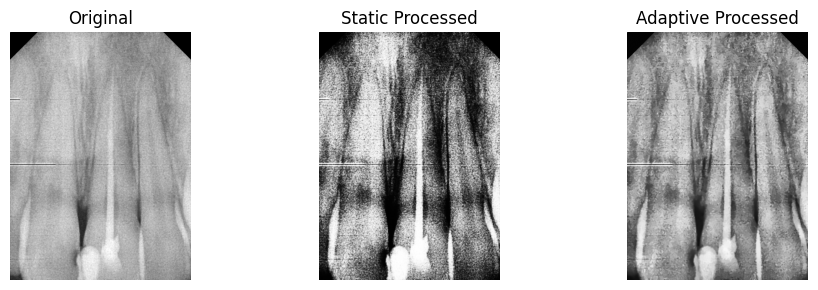

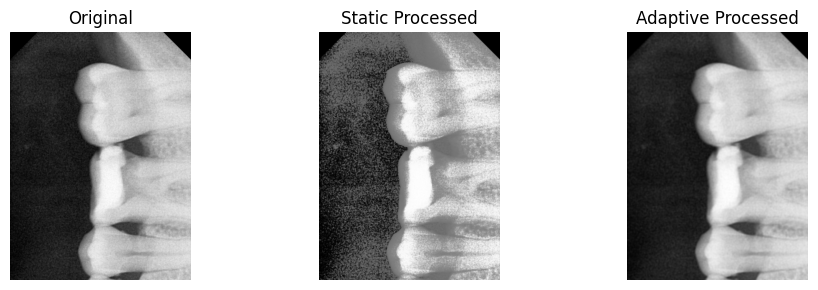

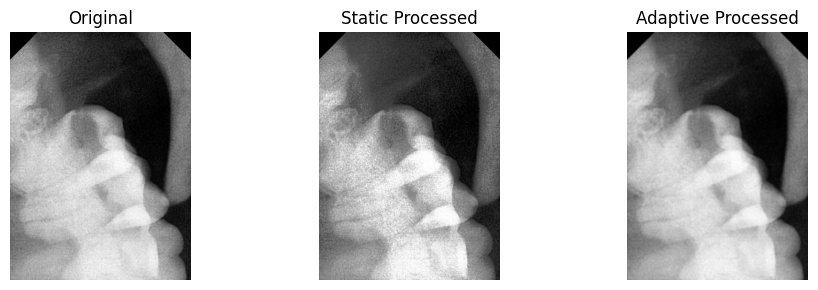

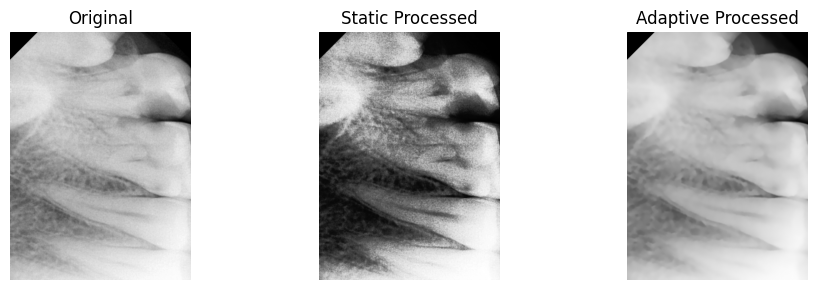

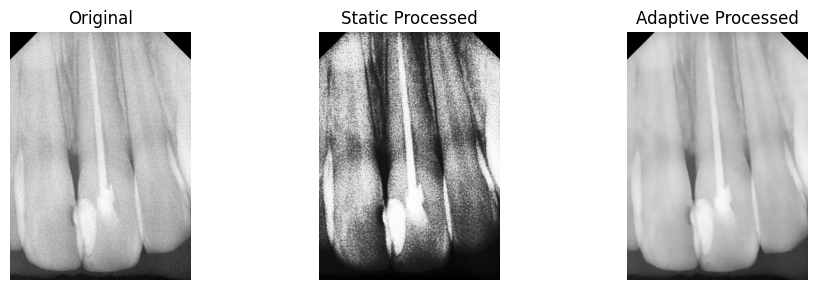

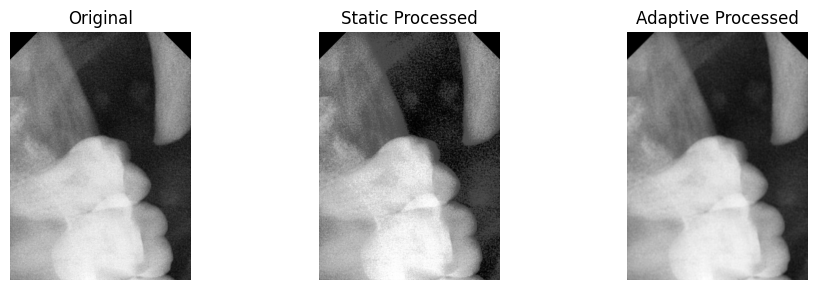

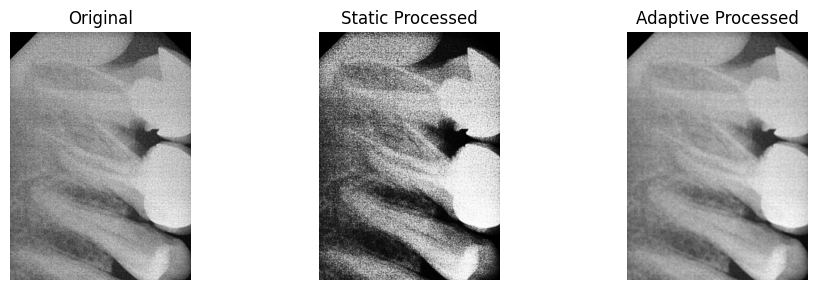

In [45]:
# Side by Side comparison of original, static and adaptive enhanced images

num_samples = min(7, len(original_images))
for i in range(num_samples):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(static_denoised_images_array[i], cmap='gray')
    plt.title('Static Processed')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(adaptive_enhanced_images_array[i], cmap='gray')
    plt.title('Adaptive Processed')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

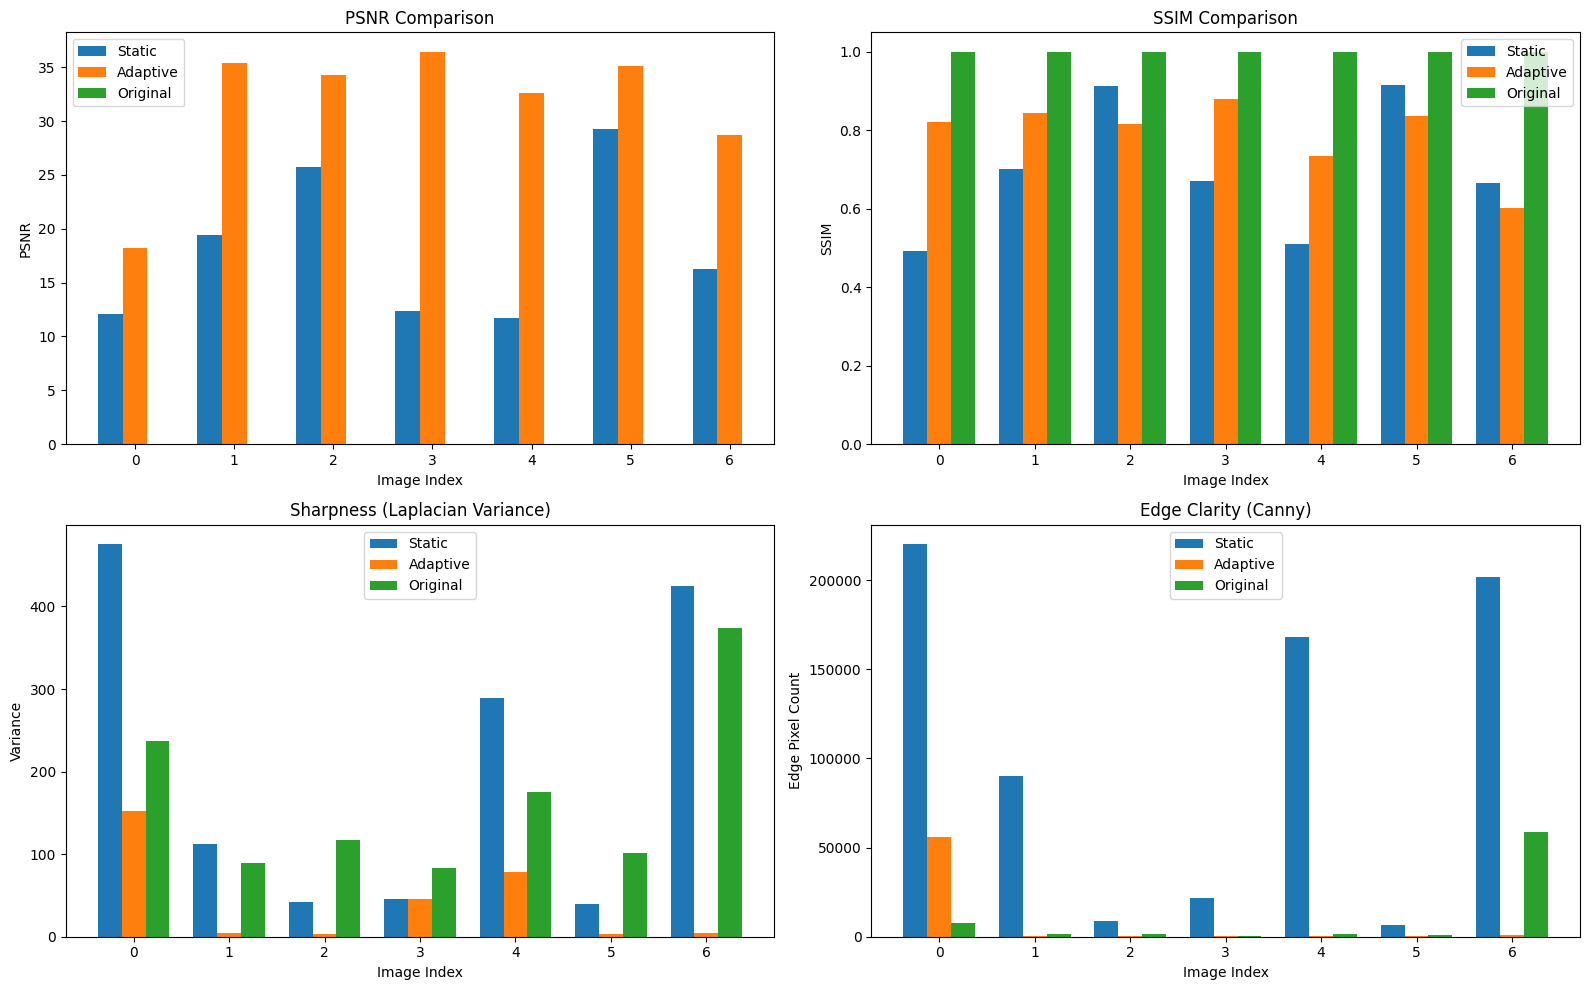

In [46]:
# Visualization using chart for all the quality's of original and processed images

x = np.arange(len(original_images))
width = 0.25
plt.figure(figsize=(16, 10))

# PSNR chart
plt.subplot(2, 2, 1)
plt.bar(x - width, psnr_static, width, label='Static')
plt.bar(x, psnr_adaptive, width, label='Adaptive')
plt.bar(x + width, psnr_original, width, label='Original')
plt.title('PSNR Comparison')
plt.xlabel('Image Index')
plt.ylabel('PSNR')
plt.legend()

# SSIM chart
plt.subplot(2, 2, 2)
plt.bar(x - width, ssim_static, width, label='Static')
plt.bar(x, ssim_adaptive, width, label='Adaptive')
plt.bar(x + width, ssim_original, width, label='Original')
plt.title('SSIM Comparison')
plt.xlabel('Image Index')
plt.ylabel('SSIM')
plt.legend()

# Sharpness chart
plt.subplot(2, 2, 3)
plt.bar(x - width, sharpness_static, width, label='Static')
plt.bar(x, sharpness_adaptive, width, label='Adaptive')
plt.bar(x + width, sharpness_original, width, label='Original')
plt.title('Sharpness (Laplacian Variance)')
plt.xlabel('Image Index')
plt.ylabel('Variance')
plt.legend()

# Edge Clarity chart
plt.subplot(2, 2, 4)
plt.bar(x - width, edges_static, width, label='Static')
plt.bar(x, edges_adaptive, width, label='Adaptive')
plt.bar(x + width, edges_original, width, label='Original')
plt.title('Edge Clarity (Canny)')
plt.xlabel('Image Index')
plt.ylabel('Edge Pixel Count')
plt.legend()

plt.tight_layout()
plt.show()


# **Designed a Grading System of images**

In [53]:
# Grading System of images based on enhancemnet of images for adaptive processed images
grades = []
grades_2 = []

def get_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 50:
        return 'C'
    else:
        return 'D'
print("Enhancement Quality Grades of Adaptive processed image :")
for i in range(len(original_images)):
    # Normalize metrics to a 0-100 range using min-max scalling method
    norm_psnr = min(psnr_adaptive[i], 50) * 2  # PSNR typically up to 50 dB → scaled to 100
    norm_ssim = ssim_adaptive[i] * 100          # SSIM 0–1 → 0–100
    norm_sharp = min(sharpness_adaptive[i], 2000) / 20  # assuming max ~2000 → scaled to 100

    score = 0.4 * norm_psnr + 0.3 * norm_ssim + 0.3 * norm_sharp
    grade = get_grade(score)
    grades.append(grade)

    print(f"Image {i:<3}: Score = {score:6.2f} => Grade: {grade}")

from collections import Counter
print("Grade Distribution:", dict(Counter(grades)))




Enhancement Quality Grades of Adaptive processed image :
Image 0  : Score =  41.49 => Grade: D
Image 1  : Score =  53.73 => Grade: C
Image 2  : Score =  51.91 => Grade: C
Image 3  : Score =  56.21 => Grade: C
Image 4  : Score =  49.37 => Grade: D
Image 5  : Score =  53.24 => Grade: C
Image 6  : Score =  41.10 => Grade: D
Grade Distribution: {'D': 3, 'C': 4}


In [52]:
# Grading System of images based on enhancemnet of images for static processed images
grades_2 = []

def get_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 50:
        return 'C'
    else:
        return 'D'
print("Enhancement Quality Grades of Static processed image :")
for i in range(len(original_images)):
    # Normalize metrics to a 0-100 range using min-max scalling method
    norm_psnr_2 = min(psnr_static[i], 50) * 2  # PSNR typically up to 50 dB → scaled to 100
    norm_ssim_2 = ssim_static[i] * 100          # SSIM 0–1 → 0–100
    norm_sharp_2 = min(sharpness_static[i], 2000) / 20  # assuming max ~2000 → scaled to 100

    score = 0.4 * norm_psnr_2 + 0.3 * norm_ssim_2 + 0.3 * norm_sharp_2
    grade = get_grade(score)
    grades_2.append(grade)

    print(f"Image {i:<3}: Score = {score:6.2f} => Grade: {grade}")

from collections import Counter
print("Grade Distribution:", dict(Counter(grades)))


Enhancement Quality Grades of Static processed image :
Image 0  : Score =  31.60 => Grade: D
Image 1  : Score =  38.25 => Grade: D
Image 2  : Score =  48.63 => Grade: D
Image 3  : Score =  30.74 => Grade: D
Image 4  : Score =  29.03 => Grade: D
Image 5  : Score =  51.50 => Grade: C
Image 6  : Score =  39.35 => Grade: D
Grade Distribution: {'D': 3, 'C': 4}
